In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [145]:
df=pd.read_csv('Space_Server.csv')  
df 

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [146]:
print(df['objid'].unique())                                
print(df['rerun'].unique())            

[1.23765e+18]
[301]


In [147]:
df=df.drop(['objid','rerun'],axis=1)  # column - objid is just identification number and rerun is having all same constant values so I have dropped both these columns
df

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [148]:
df.isnull().sum()

ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ra         10000 non-null  float64
 1   dec        10000 non-null  float64
 2   u          10000 non-null  float64
 3   g          10000 non-null  float64
 4   r          10000 non-null  float64
 5   i          10000 non-null  float64
 6   z          10000 non-null  float64
 7   run        10000 non-null  int64  
 8   camcol     10000 non-null  int64  
 9   field      10000 non-null  int64  
 10  specobjid  10000 non-null  float64
 11  class      10000 non-null  object 
 12  redshift   10000 non-null  float64
 13  plate      10000 non-null  int64  
 14  mjd        10000 non-null  int64  
 15  fiberid    10000 non-null  int64  
dtypes: float64(9), int64(6), object(1)
memory usage: 1.2+ MB


In [150]:
from sklearn.preprocessing import LabelEncoder          
lb=LabelEncoder()

df['class']=pd.DataFrame(lb.fit_transform(df['class']))
df 

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,2,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,5.033450e+17,0,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,5.033400e+17,0,0.117772,447,51877,228
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,3,162,8.222620e+18,2,-0.000402,7303,57013,622
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,5.033400e+17,0,0.014019,447,51877,229


In [151]:
print(df['class'].unique())      

[2 0 1]


In [152]:
df.skew()

ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    1.794627
class        0.169292
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

In [153]:
collist=df.columns.values
ncol=11
nrows=10 

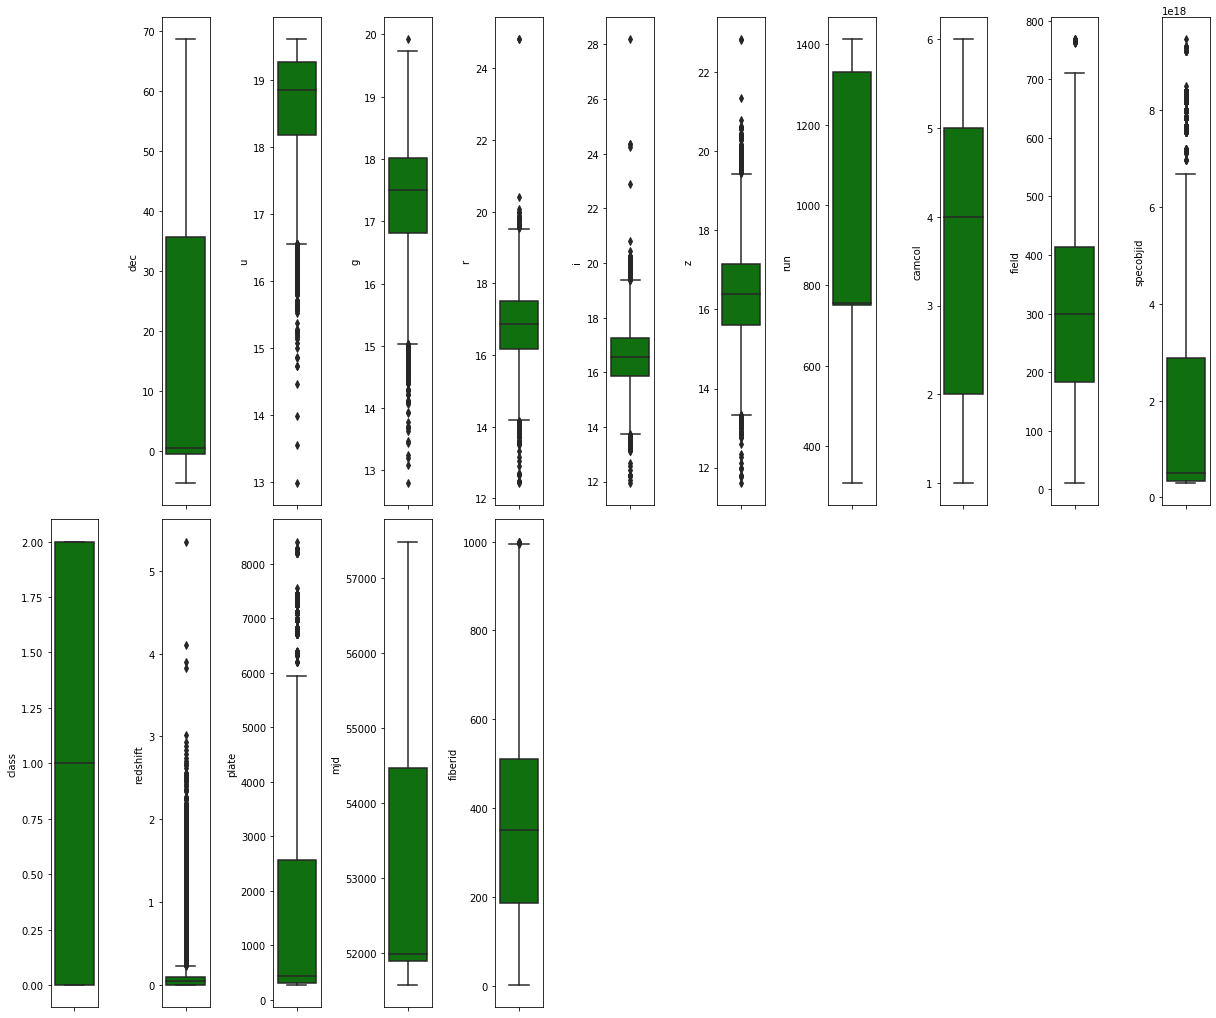

In [154]:
plt.figure(figsize=(17,70))         
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1) 
    sns.boxplot(df[collist[i]],color='green',orient='v') 
    plt.tight_layout()

In [155]:
zscore(df)
z=np.abs(zscore(df))                                                 # Removing outliers
np.where(z>3)      
df1=df[(z<3).all(axis=1)] 
df1

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,2,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,131.398915,51.533706,17.79613,16.02621,15.15955,14.71488,14.33840,1345,3,161,5.033460e+17,0,0.055515,447,51877,249
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,5.033450e+17,0,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,5.033400e+17,0,0.117772,447,51877,228
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,5.033400e+17,0,0.014019,447,51877,229


In [156]:
df1 = df1.reset_index(drop=True)
df1

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,2,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8693,131.398915,51.533706,17.79613,16.02621,15.15955,14.71488,14.33840,1345,3,161,5.033460e+17,0,0.055515,447,51877,249
8694,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,5.033450e+17,0,0.027583,447,51877,246
8695,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,5.033400e+17,0,0.117772,447,51877,228
8696,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,5.033400e+17,0,0.014019,447,51877,229


In [157]:
df1.isnull().sum()

ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A7FF5F408>,
      dtype=object)

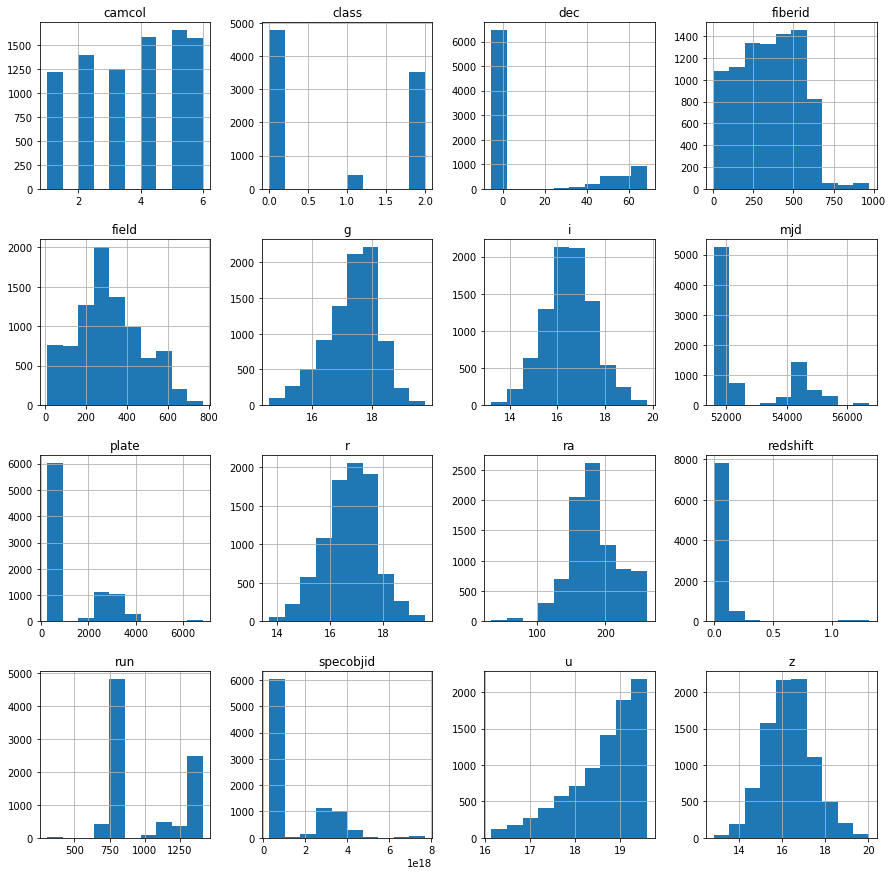

In [158]:
df1.hist(figsize=(15,15))   

# Univariate Analysis

{'bodies': [<matplotlib.collections.PolyCollection at 0x20a0697b748>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x20a0699d7c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x20a06978688>,
 'cbars': <matplotlib.collections.LineCollection at 0x20a06978d08>}

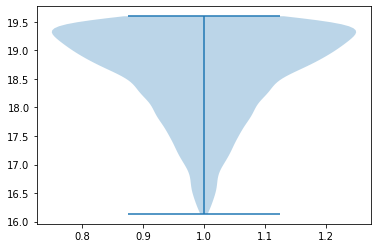

In [159]:
plt.violinplot(df1['u']) 

{'bodies': [<matplotlib.collections.PolyCollection at 0x20a067db908>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x20a067db348>,
 'cmins': <matplotlib.collections.LineCollection at 0x20a067df148>,
 'cbars': <matplotlib.collections.LineCollection at 0x20a067dff08>}

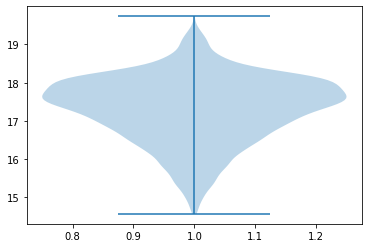

In [160]:
plt.violinplot(df1['g']) 

{'bodies': [<matplotlib.collections.PolyCollection at 0x20a06738448>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x20a06738248>,
 'cmins': <matplotlib.collections.LineCollection at 0x20a06769cc8>,
 'cbars': <matplotlib.collections.LineCollection at 0x20a06764388>}

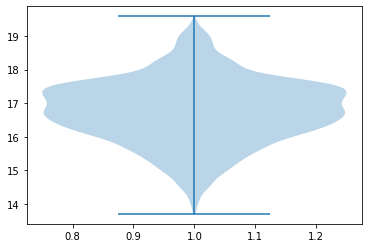

In [161]:
plt.violinplot(df1['r']) 

{'bodies': [<matplotlib.collections.PolyCollection at 0x20a06a84fc8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x20a06a84a08>,
 'cmins': <matplotlib.collections.LineCollection at 0x20a06aab588>,
 'cbars': <matplotlib.collections.LineCollection at 0x20a06aabc08>}

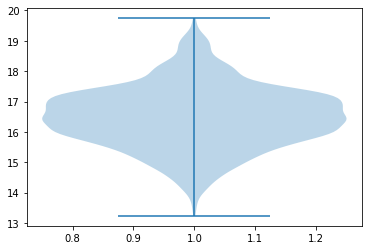

In [162]:
plt.violinplot(df1['i']) 

{'bodies': [<matplotlib.collections.PolyCollection at 0x20a0689b7c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x20a069311c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x20a06880cc8>,
 'cbars': <matplotlib.collections.LineCollection at 0x20a06874348>}

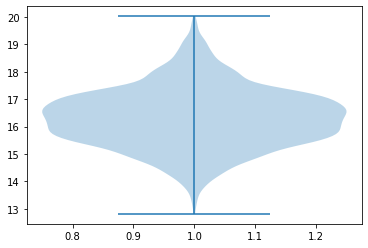

In [163]:
plt.violinplot(df1['z']) 

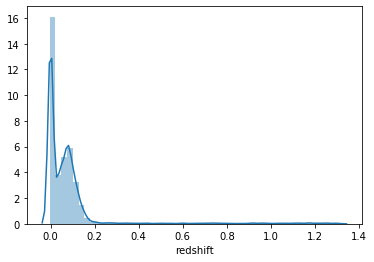

In [164]:
sns.distplot(df1['redshift']) 

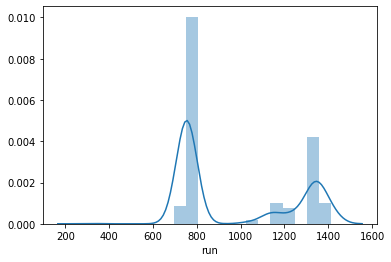

In [165]:
sns.distplot(df1['run']) 

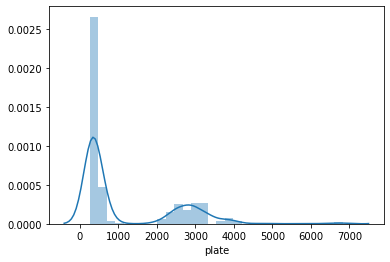

In [166]:
sns.distplot(df1['plate']) 

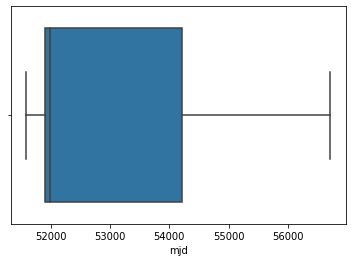

In [167]:
sns.boxplot(df1['mjd']) 

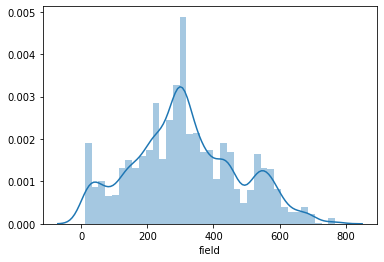

In [168]:
sns.distplot(df1['field']) 

# Bivariate Analysis with respect to target variable -  'class'  (i.e. Star or Galaxy or QSO)

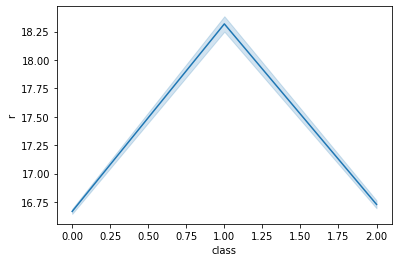

In [169]:
sns.lineplot(x='class', y='r', data=df1) 

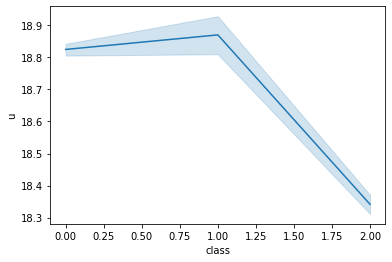

In [170]:
sns.lineplot(x='class', y='u', data=df1) 

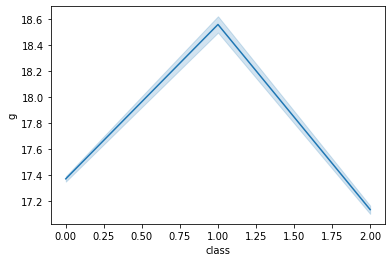

In [171]:
sns.lineplot(x='class', y='g', data=df1) 

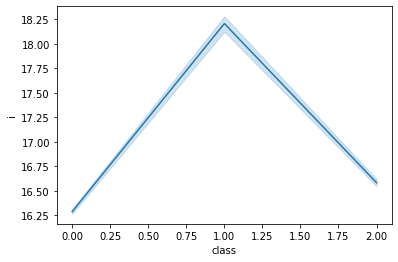

In [175]:
sns.lineplot(x='class', y='i', data=df1) 

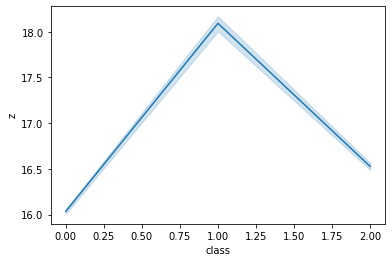

In [176]:
sns.lineplot(x='class', y='z', data=df1) 

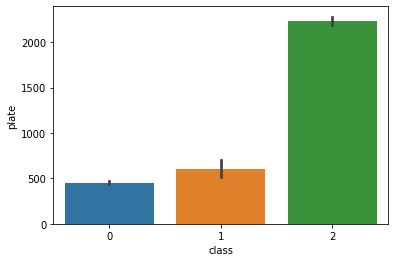

In [177]:
sns.barplot(x='class', y='plate', data=df1)    # plate is much more in QSO

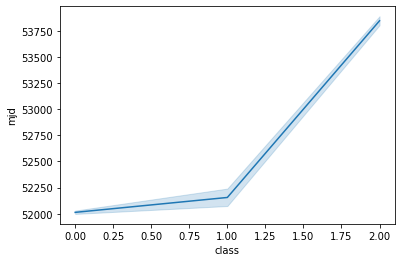

In [178]:
sns.lineplot(x='class', y='mjd', data=df1) 

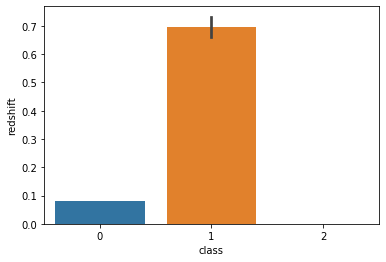

In [179]:
sns.barplot(x='class', y='redshift', data=df1)         # redshift is not present for QSO

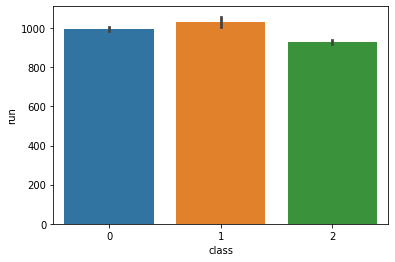

In [180]:
sns.barplot(x='class', y='run', data=df1)      

In [87]:
df1.isnull().sum() 

ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

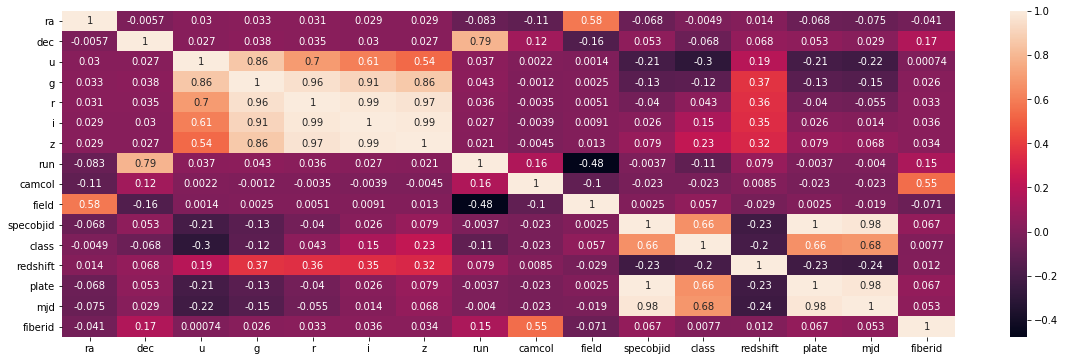

In [88]:
plt.figure(figsize=(20,6))
sns.heatmap(df1.corr(),annot=True) 

In [89]:
df1

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,2,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8693,131.398915,51.533706,17.79613,16.02621,15.15955,14.71488,14.33840,1345,3,161,5.033460e+17,0,0.055515,447,51877,249
8694,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,5.033450e+17,0,0.027583,447,51877,246
8695,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,5.033400e+17,0,0.117772,447,51877,228
8696,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,5.033400e+17,0,0.014019,447,51877,229


In [94]:
print(df1['class'].unique())        

[2 0 1]


In [90]:
df1.isnull().sum()

ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8698 entries, 0 to 8697
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ra         8698 non-null   float64
 1   dec        8698 non-null   float64
 2   u          8698 non-null   float64
 3   g          8698 non-null   float64
 4   r          8698 non-null   float64
 5   i          8698 non-null   float64
 6   z          8698 non-null   float64
 7   run        8698 non-null   int64  
 8   camcol     8698 non-null   int64  
 9   field      8698 non-null   int64  
 10  specobjid  8698 non-null   float64
 11  class      8698 non-null   int32  
 12  redshift   8698 non-null   float64
 13  plate      8698 non-null   int64  
 14  mjd        8698 non-null   int64  
 15  fiberid    8698 non-null   int64  
dtypes: float64(9), int32(1), int64(6)
memory usage: 1.0 MB


In [96]:
df1.rename(columns = {'class': 'type'}, inplace = True)  # Here target 'class' is a keyword so I changed the column name to 'type' 

In [97]:
df_x=df1.drop('type',axis=1)
df_x.head()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,0.000590,3306,54922,512


In [98]:
y=pd.DataFrame(df1.type)
y.head() 

,type
0,2
1,2
2,0
3,2
4,2


In [99]:
print(df_x.shape)
print(y.shape) 

(8698, 15)
(8698, 1)


In [100]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x) 
x = pd.DataFrame(x,columns=df_x.columns)  

In [101]:
x

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,0.022563,-0.563207,1.076410,-0.332856,-0.855097,-0.969819,-1.007660,-0.790307,0.197332,-0.304679,1.637594,-0.458367,1.637571,1.667376,0.754994
1,0.024421,-0.561415,0.039766,-0.134171,-0.098144,-0.009474,0.055512,-0.790307,0.197332,-0.304679,-0.659309,-0.458639,-0.659347,-0.883708,1.016814
2,0.026689,-0.561772,0.960026,0.994046,0.729930,0.573183,0.429065,-0.790307,0.197332,-0.298398,-0.687034,0.270060,-0.687067,-0.568969,0.870195
3,0.031964,-0.564770,-1.107002,-0.840484,-0.632831,-0.503275,-0.388577,-0.790307,0.197332,-0.292117,1.637601,-0.458969,1.637571,1.667376,0.854486
4,0.032318,-0.562701,-1.381874,-1.232219,-0.344809,0.054530,0.257682,-0.790307,0.197332,-0.292117,1.637601,-0.454822,1.637571,1.667376,0.864958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8693,-1.422261,1.458664,-1.067683,-1.506087,-1.672305,-1.737999,-1.816223,1.360326,-0.394324,-0.970460,-0.563883,-0.129865,-0.563867,-0.681596,-0.512213
8694,-1.424548,1.458894,0.237789,0.161438,0.149590,0.179351,0.159624,1.360326,-0.394324,-0.970460,-0.563884,-0.295123,-0.563867,-0.681596,-0.527922
8695,-1.424834,1.464074,-0.458904,0.124446,0.317548,0.212045,0.335821,1.360326,-0.394324,-0.964179,-0.563887,0.238472,-0.563867,-0.681596,-0.622177
8696,-1.420093,1.467286,0.320976,0.669608,0.789334,0.841588,0.737782,1.360326,-0.394324,-0.957898,-0.563887,-0.375373,-0.563867,-0.681596,-0.616941


In [103]:
x.isnull().sum()

ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
camcol       0
field        0
specobjid    0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [102]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [104]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [105]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=80,test_size=0.20) 

In [106]:
print(train_x.shape,test_x.shape)

(6958, 15) (1740, 15)


In [107]:
print(train_y.shape,test_y.shape)

(6958, 1) (1740, 1)


In [118]:
print('\n')
print('Model name - KNeighborsClassifier\n')
print('\n')
kn=KNeighborsClassifier(n_neighbors=6)  
kn.fit(train_x,train_y) 
pre=kn.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score = ',AS)
print('\n')
sc = cross_val_score(kn, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')



Model name - KNeighborsClassifier



Accuracy_score =  0.9028735632183909


Cross_Val_Score =  0.8994059759533352


classification_report
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       959
           1       0.93      0.74      0.83        93
           2       0.95      0.84      0.89       688

    accuracy                           0.90      1740
   macro avg       0.92      0.85      0.88      1740
weighted avg       0.91      0.90      0.90      1740



confusion matrix
 [[924   5  30]
 [ 22  69   2]
 [110   0 578]]




In [119]:
print('\n')
print('Model name - SupportVectorClassifier\n')
print('\n')
sv=SVC(C=10,kernel='rbf') 
sv.fit(train_x,train_y)
pre=sv.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS) 
print('\n')
sc = cross_val_score(sv, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')



Model name - SupportVectorClassifier



Accuracy_score=  0.978735632183908


Cross_Val_Score =  0.9809161012129148


classification_report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       959
           1       0.94      0.84      0.89        93
           2       0.98      1.00      0.99       688

    accuracy                           0.98      1740
   macro avg       0.97      0.94      0.95      1740
weighted avg       0.98      0.98      0.98      1740



confusion matrix
 [[939   5  15]
 [ 15  78   0]
 [  2   0 686]]




In [120]:
print('\n')
print('Model name - DecisionTreeClassifier\n')
print('\n')
dt=DecisionTreeClassifier(criterion='gini') 
dt.fit(train_x,train_y)
pre=dt.predict(test_x)  
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)  
print('\n')
sc = cross_val_score(dt, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')



Model name - DecisionTreeClassifier



Accuracy_score=  0.9844827586206897


Cross_Val_Score =  0.983789796701189


classification_report
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       959
           1       0.88      0.85      0.86        93
           2       1.00      1.00      1.00       688

    accuracy                           0.98      1740
   macro avg       0.95      0.95      0.95      1740
weighted avg       0.98      0.98      0.98      1740



confusion matrix
 [[947  11   1]
 [ 14  79   0]
 [  1   0 687]]




In [121]:
print('\n')
print('Model name - RandomForestClassifier\n')
print('\n')
rfc=RandomForestClassifier(criterion='gini',n_estimators=1000) 
rfc.fit(train_x,train_y) 
pre=rfc.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(rfc, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')



Model name - RandomForestClassifier



Accuracy_score=  0.985632183908046


Cross_Val_Score =  0.9882734812110631


classification_report
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       959
           1       0.93      0.84      0.88        93
           2       0.99      1.00      1.00       688

    accuracy                           0.99      1740
   macro avg       0.97      0.94      0.96      1740
weighted avg       0.99      0.99      0.99      1740



confusion matrix
 [[949   6   4]
 [ 15  78   0]
 [  0   0 688]]




In [122]:
print('\n')
print('Model name - GradientBoostingClassifier\n')
print('\n')
gbc=GradientBoostingClassifier(learning_rate=0.001, n_estimators=900) 
gbc.fit(train_x,train_y)
pre=gbc.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(gbc, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')



Model name - GradientBoostingClassifier



Accuracy_score=  0.9839080459770115


Cross_Val_Score =  0.9871236591140564


classification_report
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       959
           1       0.92      0.82      0.86        93
           2       0.99      1.00      1.00       688

    accuracy                           0.98      1740
   macro avg       0.96      0.94      0.95      1740
weighted avg       0.98      0.98      0.98      1740



confusion matrix
 [[948   7   4]
 [ 17  76   0]
 [  0   0 688]]




In [123]:
print('\n')
print('Model name - AdaBoost Classifier\n')
print('\n')
adc=AdaBoostClassifier(base_estimator=dt,learning_rate=0.01,n_estimators=10,algorithm='SAMME')
adc.fit(train_x,train_y)
pre=adc.predict(test_x)  
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(adc, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')



Model name - AdaBoost Classifier



Accuracy_score=  0.9827586206896551


Cross_Val_Score =  0.9811458540005026


classification_report
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       959
           1       0.86      0.84      0.85        93
           2       1.00      1.00      1.00       688

    accuracy                           0.98      1740
   macro avg       0.95      0.94      0.94      1740
weighted avg       0.98      0.98      0.98      1740



confusion matrix
 [[945  13   1]
 [ 15  78   0]
 [  1   0 687]]




In [124]:
print('\n')
print('Model name - XGBoost Classifier\n')
print('\n')
xgb=XGBClassifier(alpha=1, max_depth=6)
xgb.fit(train_x,train_y)
pre=xgb.predict(test_x) 
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(xgb, x, y, cv=10, scoring='accuracy').mean() 
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')



Model name - XGBoost Classifier



Accuracy_score=  0.9873563218390805


Cross_Val_Score =  0.9899978836818644


classification_report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       959
           1       0.91      0.86      0.88        93
           2       1.00      1.00      1.00       688

    accuracy                           0.99      1740
   macro avg       0.96      0.95      0.96      1740
weighted avg       0.99      0.99      0.99      1740



confusion matrix
 [[950   8   1]
 [ 13  80   0]
 [  0   0 688]]




In [125]:
# Here XGBClassifier is working best with an Accuracy Score of 0.9873563218390805 so I am saving the Model
from sklearn.externals import joblib
joblib.dump(xgb, 'XGBoost_Space_Server.pkl')  

['XGBoost_Space_Server.pkl']